In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from PIL import Image

import seaborn as sns

import nltk
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("D:/Labs/creditcard.csv",sep=",")
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df))

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df)
pca = PCA()
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

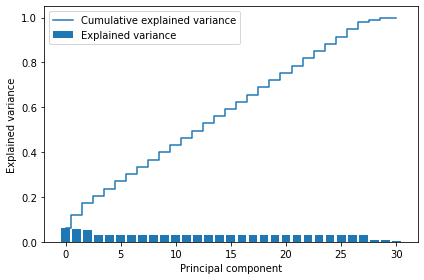

In [5]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

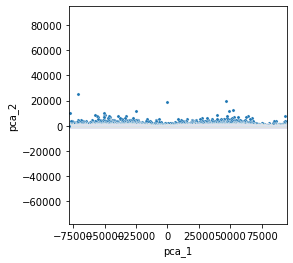

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

In [7]:
num_points = 300

mean_1 = [2, 2]
cov_1 = [[6, 1], [1, 6]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [-3, -3]
cov_2 = [[5, -2], [-2, 5]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)

In [8]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)
print('weights ')
print(GMM.weights_)

means 
[[-2.71062214 -2.87486477]
 [ 1.99942419  2.50477005]]
covariances 
[[[ 4.76403691 -1.65424314]
  [-1.65424314  5.48441674]]

 [[ 5.7388066   0.95813391]
  [ 0.95813391  4.72546006]]]
weights 
[0.51897686 0.48102314]


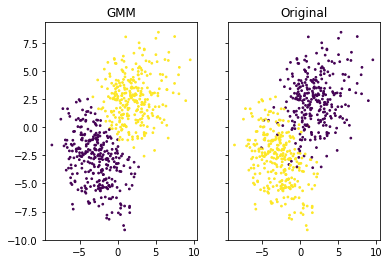

In [9]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

In [11]:
n_colors = 64
img = Image.open('D:/Labs/photo.jpg')
img = np.array(img, dtype=np.float64)/255
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

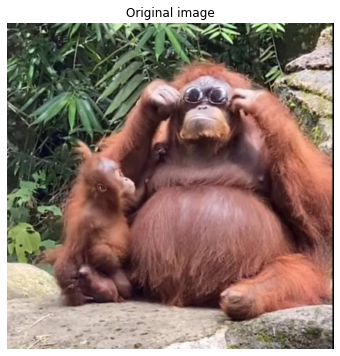

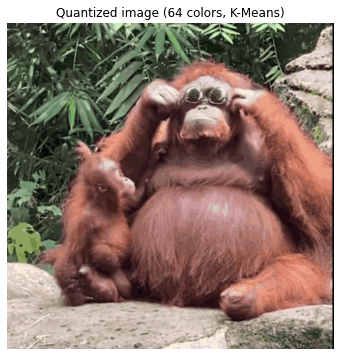

In [12]:
plt.figure(1, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))


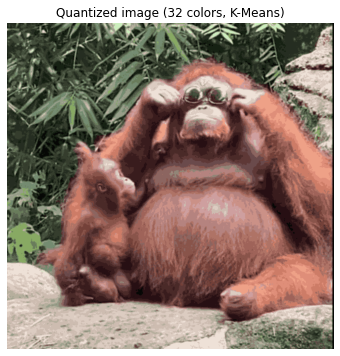

In [13]:
n_colors = 32
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

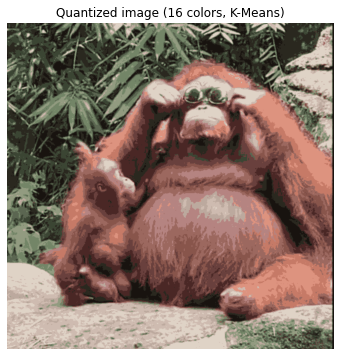

In [14]:
n_colors = 16
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

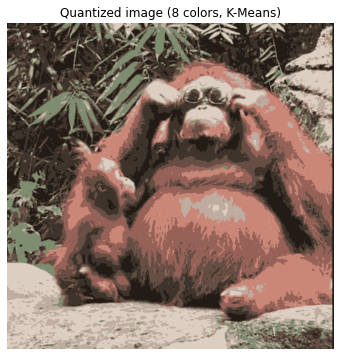

In [15]:
n_colors = 8
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [16]:
messages = pd.read_csv('D:/Labs/spam.csv', encoding='latin-1')
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
messages = messages.rename(columns={'v1': 'class','v2': 'text'})

def process_text(text):    
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

from collections import Counter
Counter(messages['class'])

Counter({'ham': 4825, 'spam': 747})

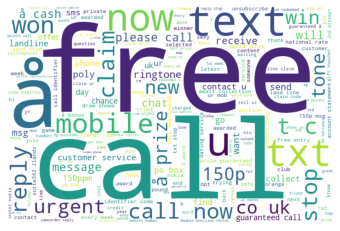

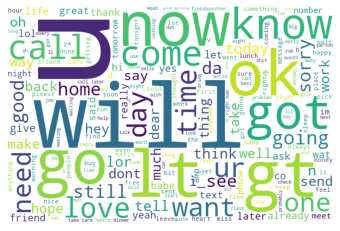

In [17]:
def visualize(label):
    text = ''
    for msg in messages[messages['class'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('spam')
visualize('ham')

Accuracy:  0.9632286995515695


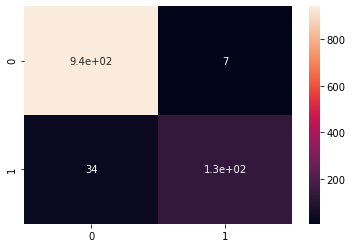

In [18]:
messages['text'].apply(process_text).head()
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['class'],test_size=0.2)
vectorizer = CountVectorizer(stop_words='english')
msg_train_transformed = vectorizer.fit_transform(msg_train)
msg_test_transformed = vectorizer.transform(msg_test)

rfc = AdaBoostClassifier()
rfc.fit(msg_train_transformed, class_train)
predictions = rfc.predict(msg_test_transformed)

print('Accuracy: ', accuracy_score(class_test,predictions))
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
plt.show()

In [19]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

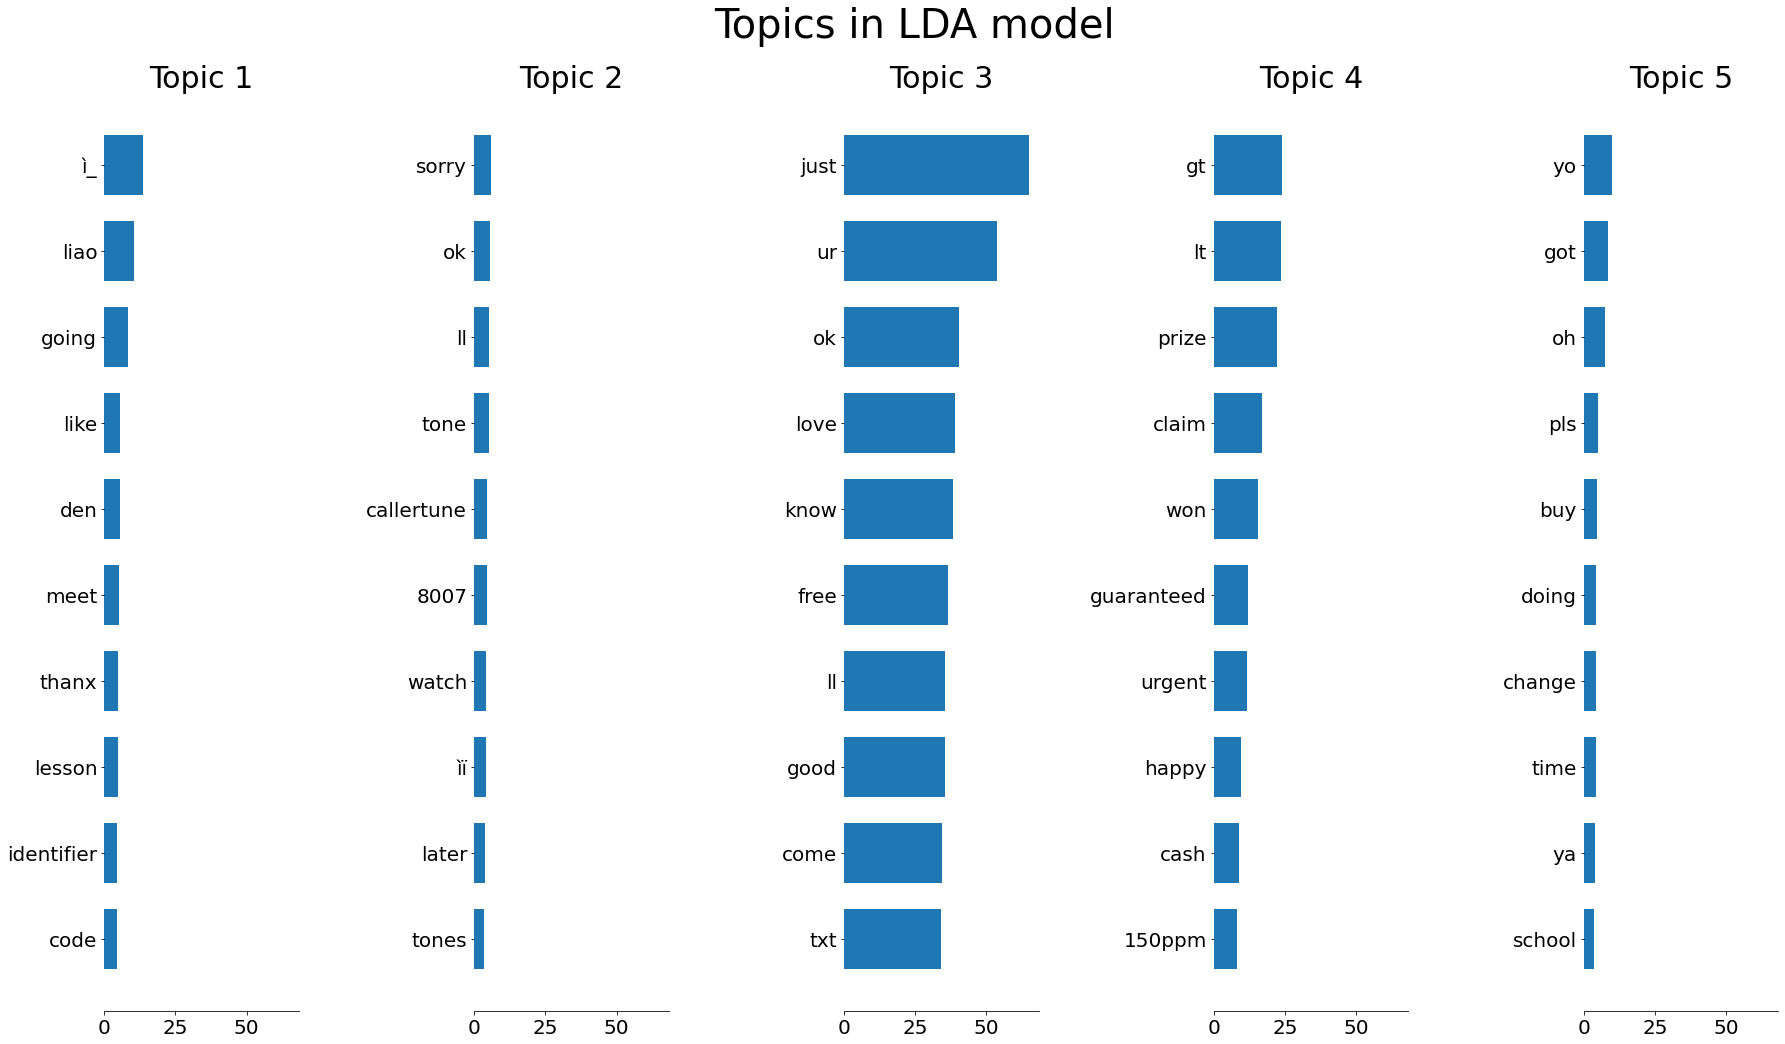

In [20]:
n_features = 1500
n_components = 5
n_top_words = 10

lda = LatentDirichletAllocation(n_components=n_components, max_iter=3,
                                learning_method='online',
                                learning_offset=50., random_state = 0)

lda.fit(msg_train_transformed)
lda.fit(msg_test_transformed)
feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')